<a href="https://colab.research.google.com/github/guangyitan/Udemy-Unsupervised-Machine-Learning-with-2-Capstone-ML-Projects/blob/main/Implementing_Kmeans_on_Mall_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# mount to google drive
from google.colab import drive 
drive.mount('/content/MyDrive')
project_path = '/content/MyDrive/My Drive/Colab Notebooks/Udemy/Mall Customer Segmentation/'

#read the excel file
data = pd.read_csv(project_path + "Mall_Customers.csv")
data.shape

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


(200, 5)

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Visualise the dataset
Perform K-means Clustering Using **Annual Income (k$) & Spending Score (1-100)**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

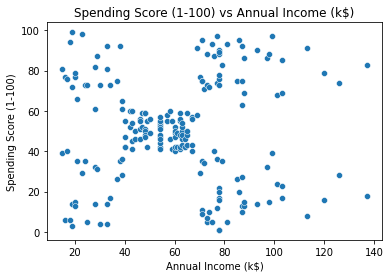

In [5]:
# visualise the data
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Spending Score (1-100) vs Annual Income (k$)')

In [6]:
# get the two columns and convert it into an array
# the .values command converts the data from DataFrame type to numpy.ndarray type
X = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

print(X.shape)
print(type(X))

(200, 2)
<class 'numpy.ndarray'>


# 2D K-means
Now we calculate the **Within Cluster Sum of Squared Errors (WSS)** for different values of k. 

Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.


In [7]:
# calculate wcss for diff val of k from 1 to 10
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

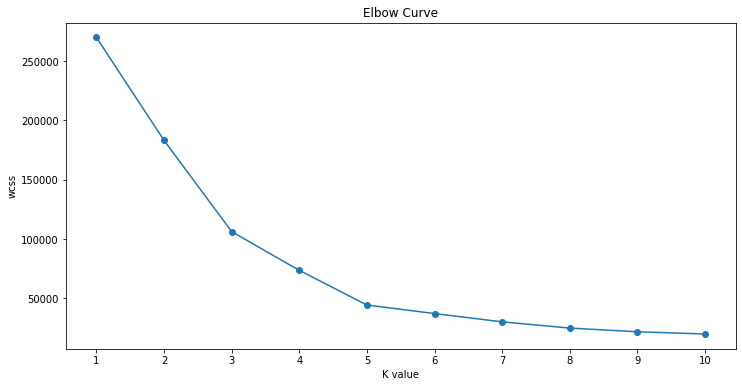

In [8]:
# plot the elbow curve graph

# set graph figure size for better visualization
plt.figure(figsize=(12,6))
plt.plot(range(1,11), wcss,  marker ="o")
# set the x-axis to show increment by 1
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Curve")
plt.xlabel("K value")
plt.ylabel("wcss")
plt.show()

From the graph, we can see after K = 5, the drop is minimal. So we choose K = 5.

In [9]:
# set random_state to make the results reproducible
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
#Fitting the input data
km.fit(X)
#predicting the labels of the input data
y_means = km.predict(X)
#adding the predicted y to a column named label
df1 = data.copy()
df1["label"] = y_means
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


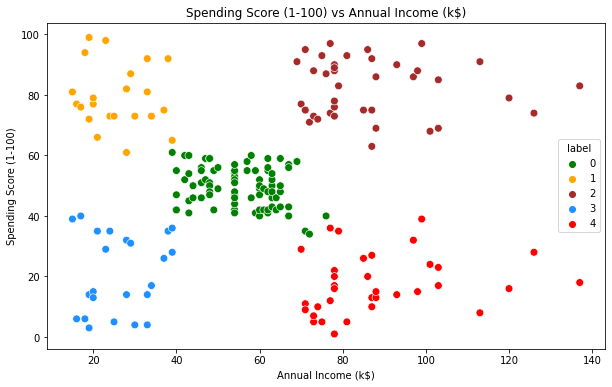

In [10]:
# Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# 3D K-means
use 3 columns "Age","Annual Income (k$)","Spending Score (1-100)"

In [11]:
#Taking the features
df2 = data.copy()
X2 = df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for i in range(1,11):
    km2 = KMeans(n_clusters=i, init="k-means++")
    km2.fit(X2)
    wcss.append(km2.inertia_)

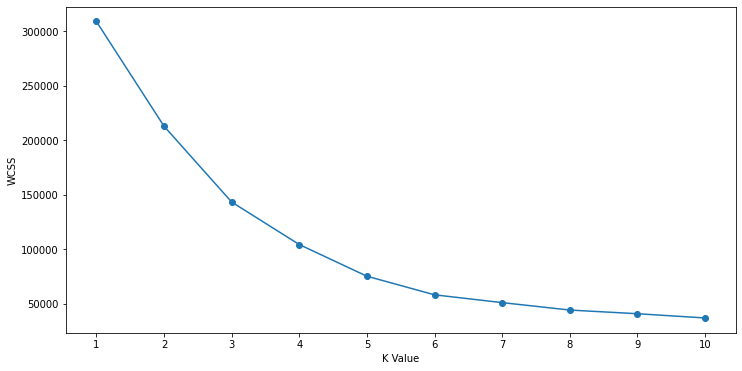

In [12]:
plt.figure(figsize=(12,6))    
plt.plot(range(1,11), wcss, marker ="o")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [13]:
#Using k =5 where WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2
#The data with labels
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


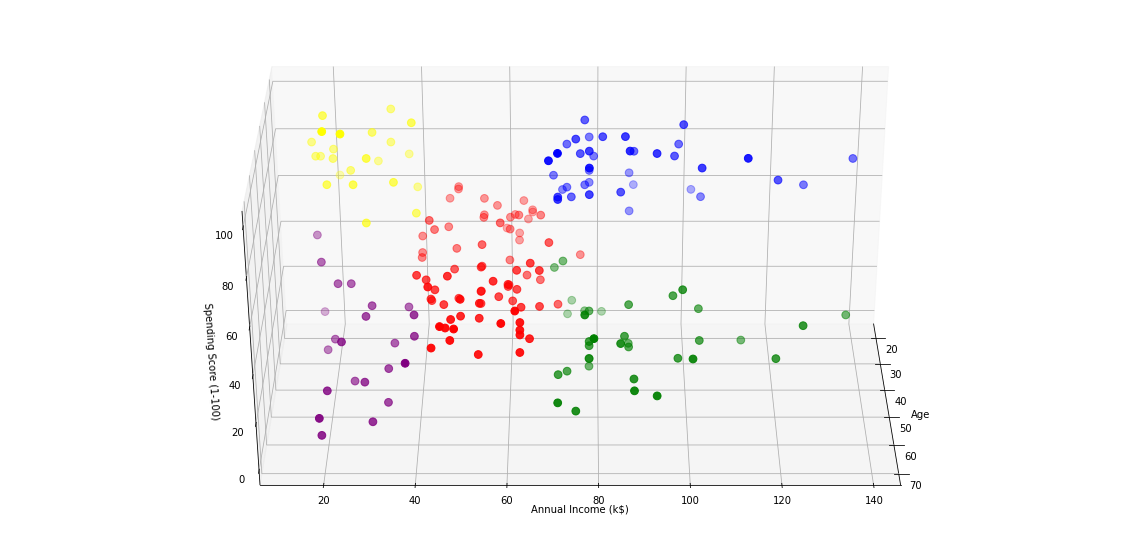

In [28]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(30, 0)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()